In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ugradio
import astropy.coordinates
import astropy.time
import time
import astropy.io.fits as fits

In [2]:
data_noise_on = []
data_noise_off = []

In [3]:
data_noise_off_example = fits.open('../Data/celestial_pole-noiseoff_' + str(0) + '.fits')

In [4]:
for i in range(0, 386):
    d_off_avg = []
    d_on_avg = []
    for j in range(1, 21):
        d_off = fits.open('../Data/celestial_pole-noiseoff_' + str(i) + '.fits')
        d_off = d_off[j].data['auto0_real']
        d_off_avg.append(d_off)
    d_off_avg = np.mean(d_off_avg, axis=0)
    data_noise_off.append(d_off_avg)
    
    for k in range(1, 3):
        d_on = fits.open('../Data/celestial_pole-noiseon_' + str(i) + '.fits')[k].data['auto0_real']
        d_on_avg.append(d_on)
    d_on_avg = np.mean(d_on_avg, axis=0)
    data_noise_on.append(d_on_avg)

In [5]:
hdr = dict(data_noise_off_example[0].header)
if_freq = 144 + np.arange(0, hdr['NCHAN']) * hdr['RES'] / 1e6
rf_freq = if_freq + 2*635

# this is wrong and stupid
data_noise_on_average = np.mean(data_noise_on, axis=0)
data_noise_off_average = np.mean(data_noise_off, axis=0)

<IPython.core.display.Javascript object>


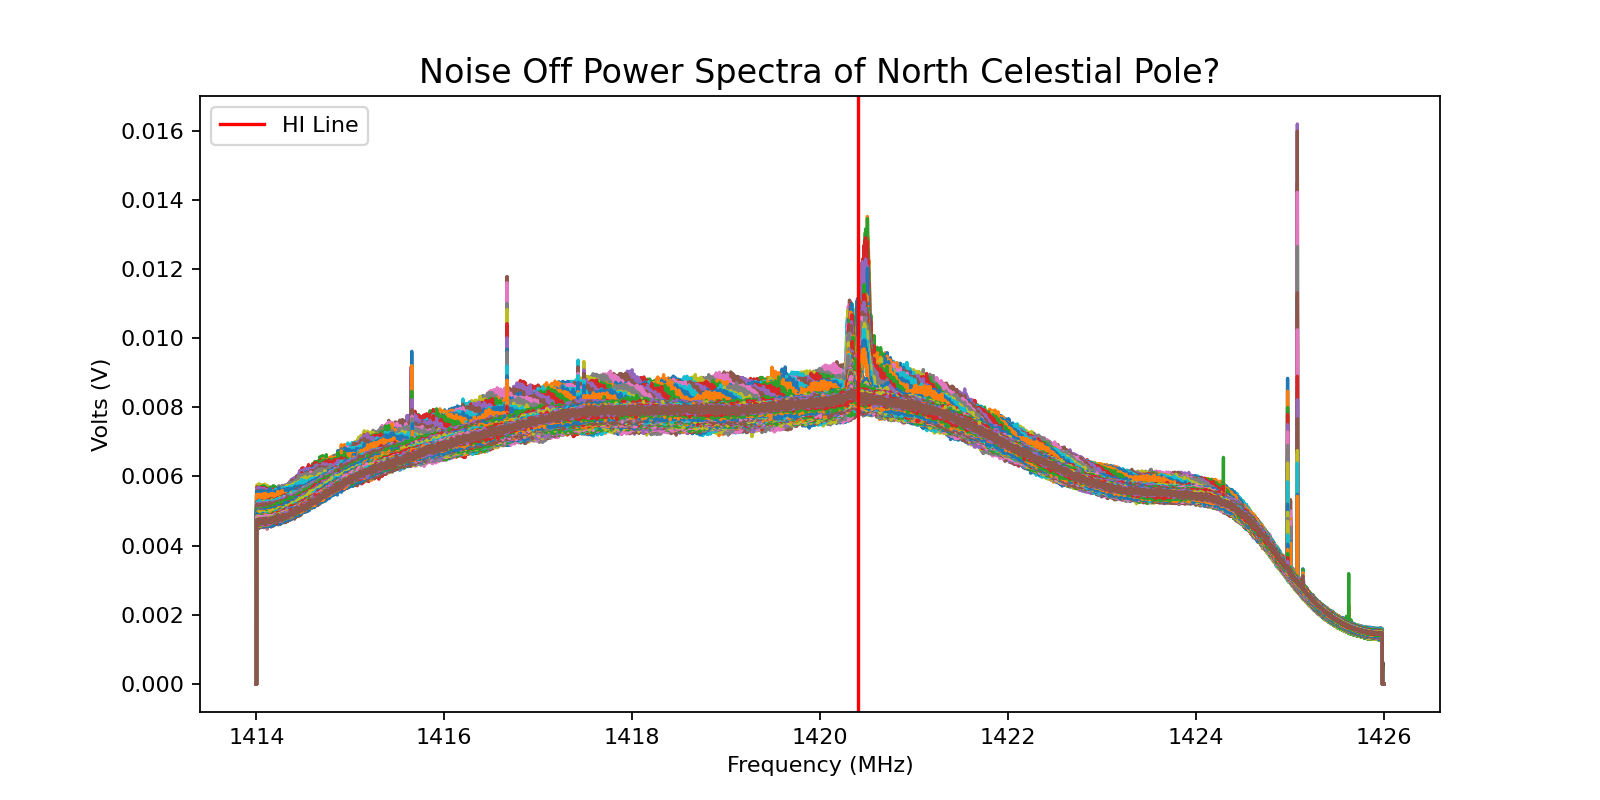

In [10]:
%matplotlib notebook
plt.figure(figsize=(10,5))

for i in range(0,386):
    
    #plt.plot(rf_freq, data_noise_on[i], label='ON')
    plt.plot(rf_freq, data_noise_off[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise Off Power Spectra of North Celestial Pole?', fontsize=15)
plt.legend()

#redshifted 

<IPython.core.display.Javascript object>


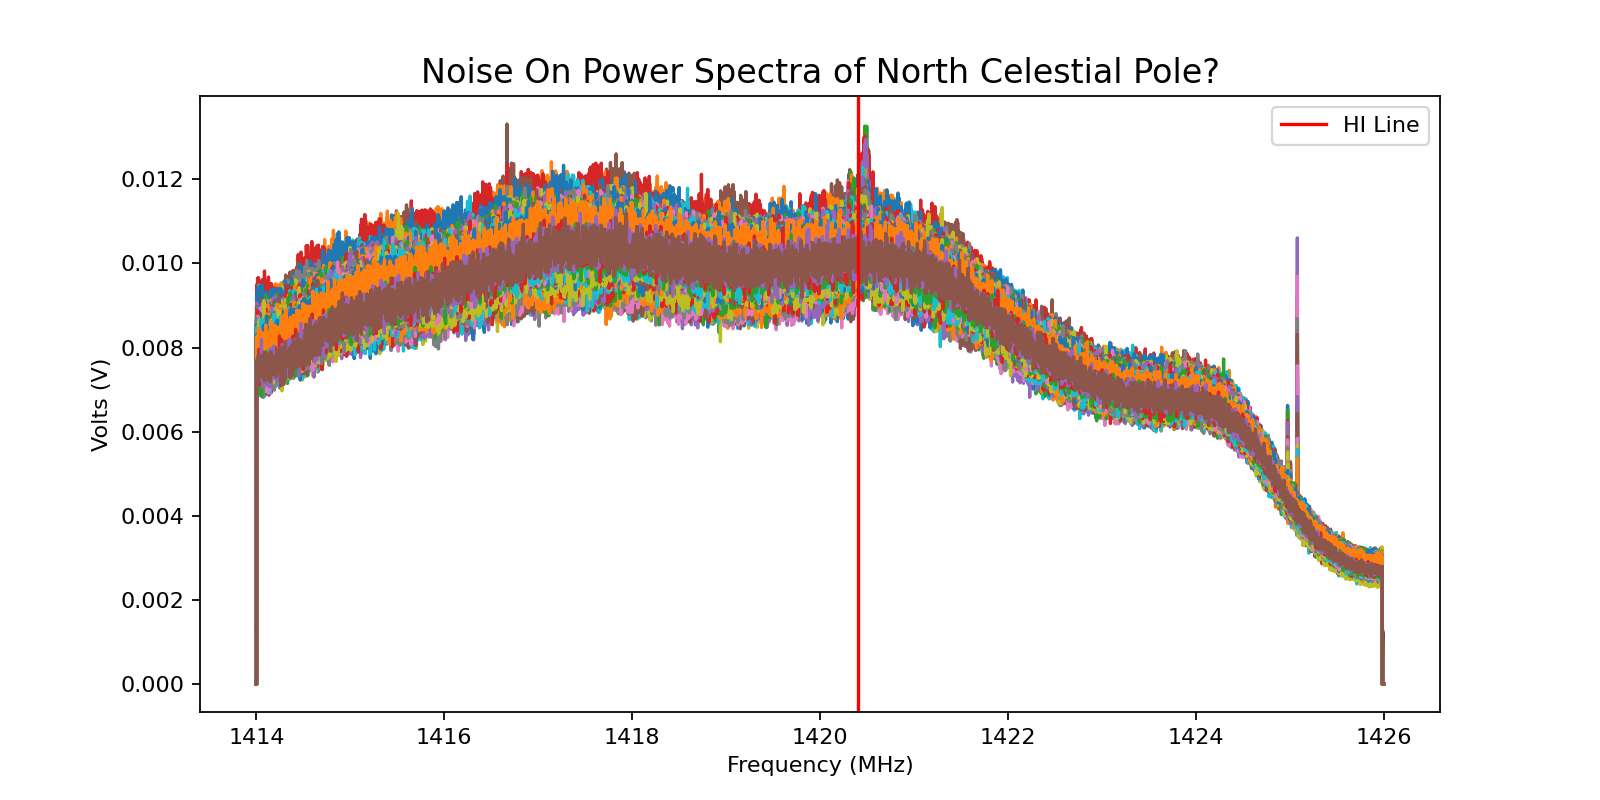

In [11]:
%matplotlib notebook
plt.figure(figsize=(10,5))

for i in range(0,386):
    
    plt.plot(rf_freq, data_noise_on[i])
    #plt.plot(rf_freq, data_noise_off[i])

plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='r', label='HI Line')
plt.title('Noise On Power Spectra of North Celestial Pole?', fontsize=15)
plt.legend()

#redshifted 

# Calibration 

In [12]:
import tqdm 

In [13]:
data_noise_on[i].shape[0]

8192

<IPython.core.display.Javascript object>


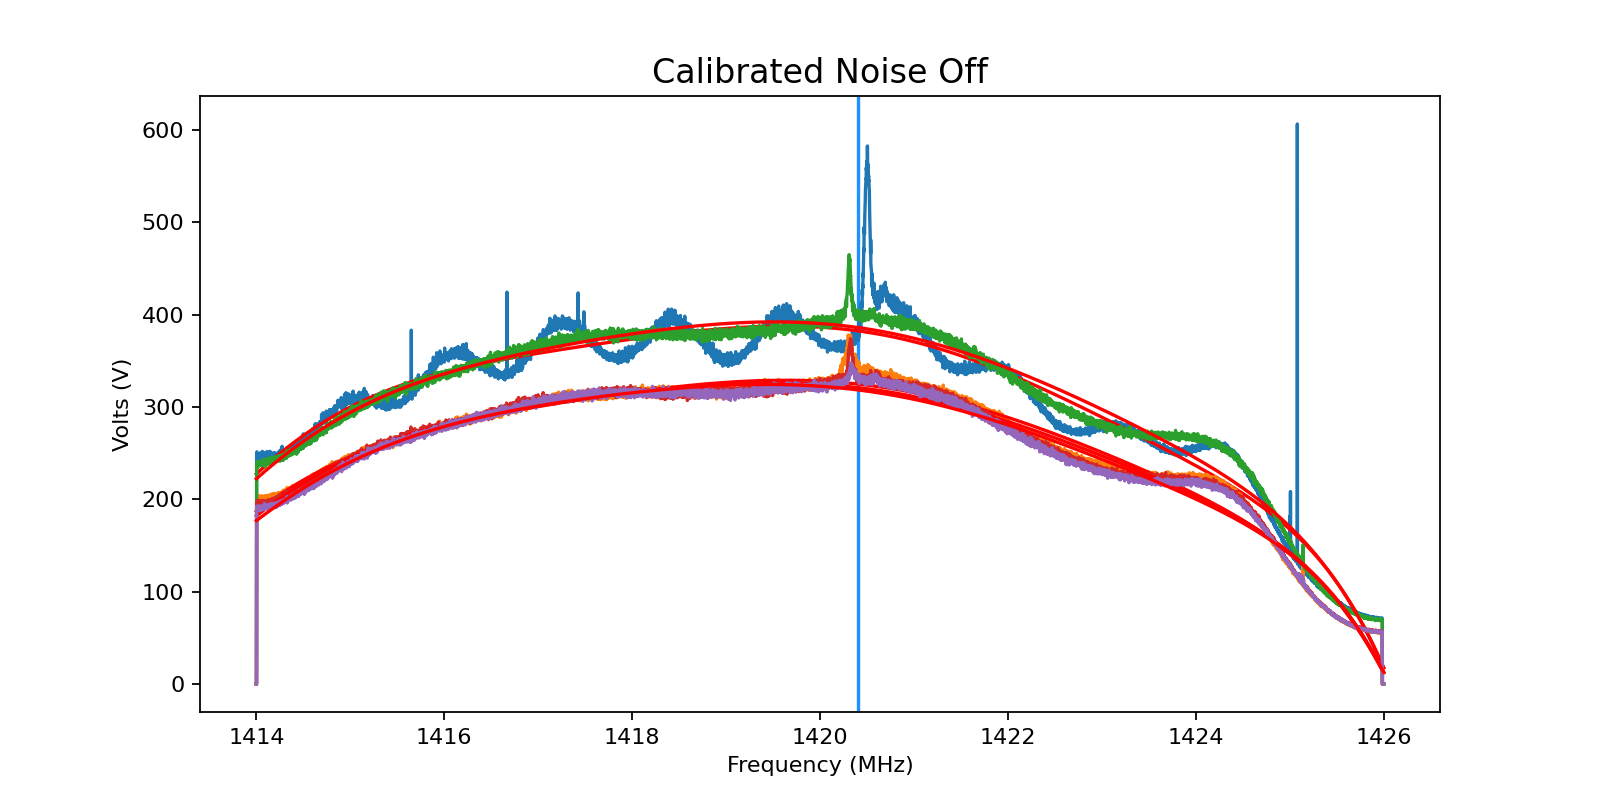

100%|██████████| 5/5 [00:00<00:00, 88.41it/s]


In [19]:
# are these values correct?
t_noise = 90
t_sys = 2.5

%matplotlib notebook
plt.figure(figsize=(10,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Volts (V)')
plt.axvline(1420.405, color='dodgerblue', label='HI Line')
plt.title('Calibrated Noise Off', fontsize=15)

for i in tqdm.tqdm(range(0, 386, 80)):
    
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    p = np.polyfit(np.arange(np.array(s_line).shape[0]), s_line, 7)
    
    fit = np.polyval(p, np.arange(np.array(data_noise_off[i]).shape[0]))
    
    plt.plot(rf_freq, g*(s_line), label='ON') #off

    plt.plot(rf_freq, g*fit, "r")

In [121]:
calibrated_noise_off_spectra = []

<IPython.core.display.Javascript object>


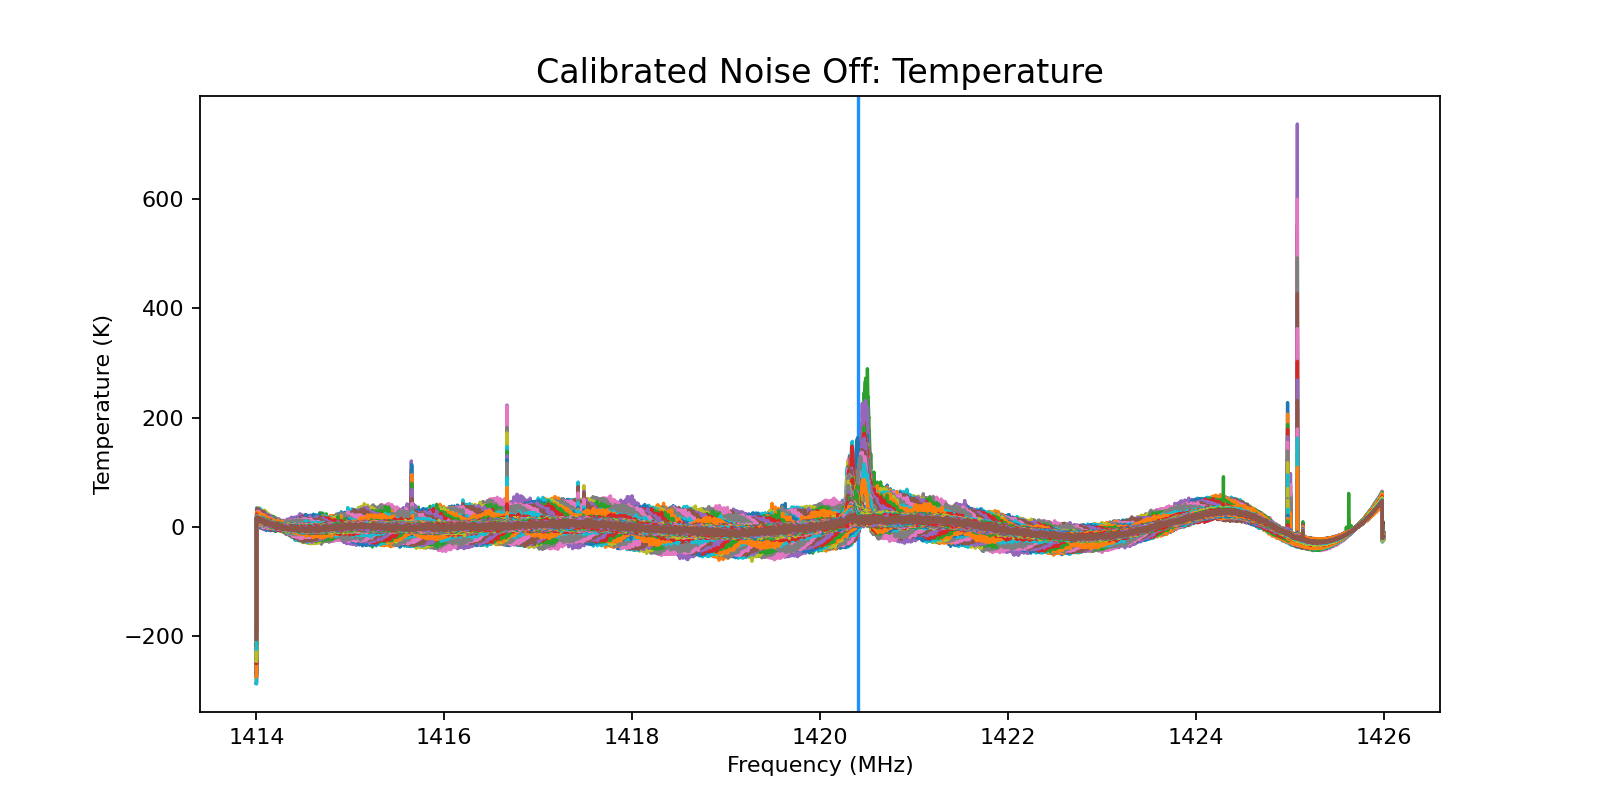

100%|██████████| 386/386 [00:04<00:00, 96.23it/s] 


In [122]:
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.axvline(1420.405, color='dodgerblue', label='HI Line')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)

for i in tqdm.tqdm(range(0, 386)):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    p = np.polyfit(np.arange(np.array(s_line).shape[0]), s_line, 7)
    
    fit = np.polyval(p, np.arange(np.array(data_noise_off[i]).shape[0]))
    
    plt.plot(rf_freq, g*(s_line - fit), label='ON') #off
    
    calibrated_noise_off_spectra.append(g*(s_line - fit))

<IPython.core.display.Javascript object>


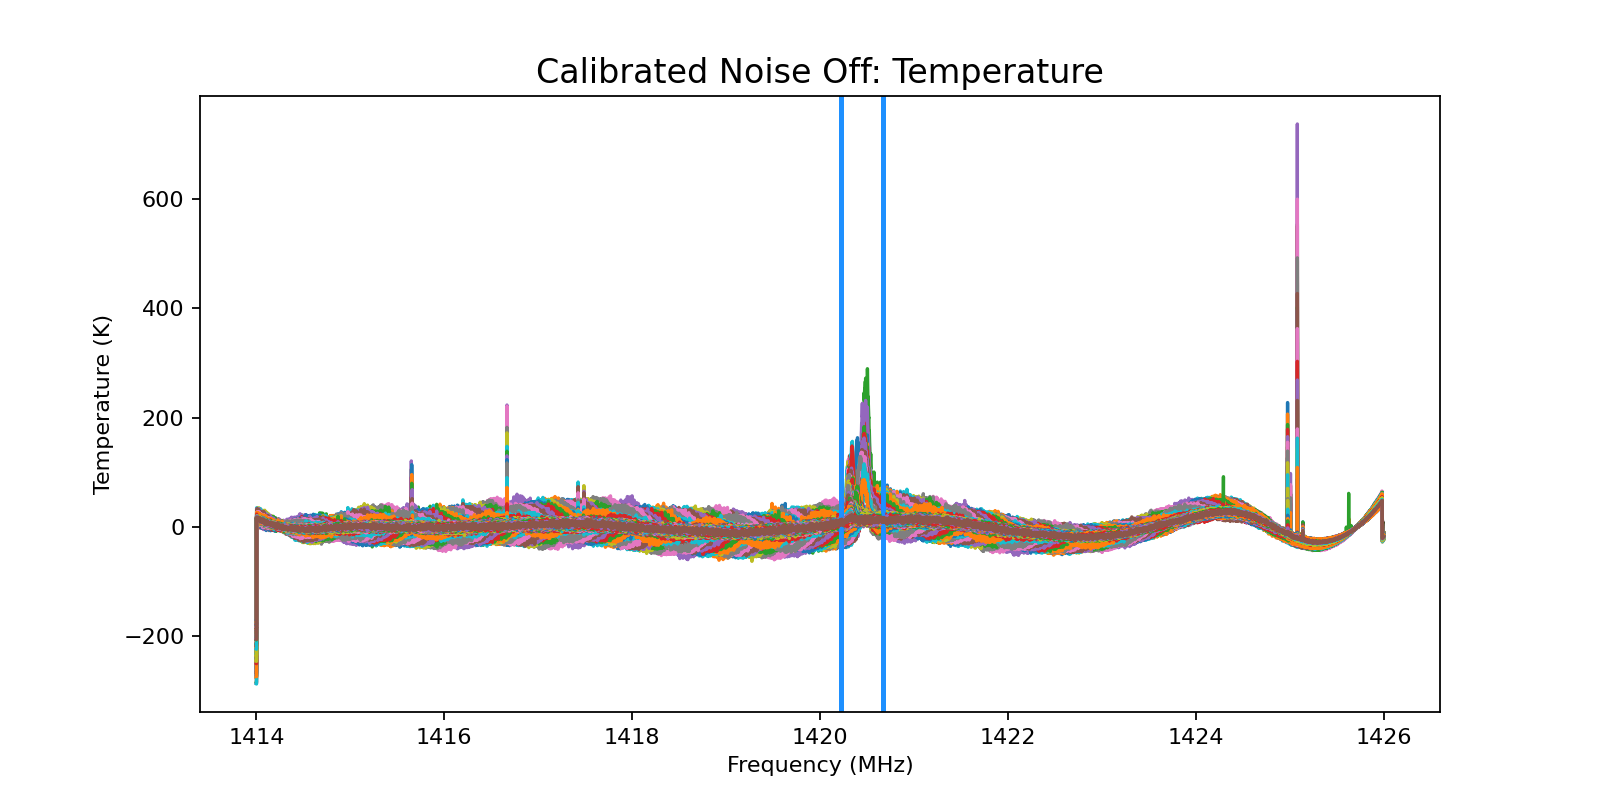

100%|██████████| 386/386 [00:05<00:00, 70.00it/s]


In [123]:
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Temperature (K)')
plt.title('Calibrated Noise Off: Temperature', fontsize=15)

for i in tqdm.tqdm(range(0, 386)):
    g = (t_noise - t_sys) / np.sum(data_noise_on[i] - data_noise_off[i]) * np.sum(data_noise_on[i])

    s_line = data_noise_off[i]/(np.mean(data_noise_off[i][3000:4000])) #~8000 data points, don't include peak in avg
    
    p = np.polyfit(np.arange(np.array(s_line).shape[0]), s_line, 7)
    
    fit = np.polyval(p, np.arange(np.array(data_noise_off[i]).shape[0]))
    
    plt.axvline(rf_freq[4250], color='dodgerblue')
    plt.axvline(rf_freq[4550], color='dodgerblue')
    
    plt.plot(rf_freq, g*(s_line - fit), label='ON') #off

In [ ]:
#there is still ripple gain

#get rid by fitting region where the spike is not

#spike will be at different - look at a few spectra and see where spike moves to, how much it changes
#how fast do we expect the area around the north celecstial pole to 
#use that to find out how redshfited/ doppler shifted the object is 

#exclude frequencies -- use cursor to find right and left bounds on frequency on 5 or 10 random files -- break them up
#polyfit exluding peak but include region set around peak
#to make sure our peak is closer to zero

# Next Steps

In [ ]:
galactic_1d_grid = []
galactic_latitude_array = np.arange(15, 50, 2)
galactic_longitude_array = np.arange(105, 160, 2)

for lat in galactic_latitude_array:
    for long in galactic_longitude_array:
        galactic_1d_grid.append((lat, long))
        
# get l,b for each spectra
# select 21cm line, and stick power into each grid 
# missing velocity - 
# low freq, mid freq, and high freq grids 

In [ ]:
# 2d_array same size as galactic grid
# pick channel that span, sum it all up, get one number

# calibrated_noise_off_spectra
# axis 1 : long, axis 2: lat, axis 3: vel 

In [124]:
# sum up hi line power for each pointing
# finds out how much hydrogen per pointing
# select blue shifted hydrogen
# select red shifted hydrogen 
power_grid = []
for spectra in calibrated_noise_off_spectra:
    power = np.sum(spectra[4250 : 4551]) / 300  # fix this later # do different slices 
    power_grid.append(power)

In [125]:
power_grid

[34.61284105637492,
 45.36333334463876,
 74.43542036218527,
 63.33375489097561,
 77.39251730298328,
 44.228711573938085,
 34.8205667097178,
 19.334701073247576,
 12.893658987589493,
 18.37702164032089,
 31.204981679007844,
 51.73418640705039,
 34.70019294361875,
 35.90922899820103,
 40.730128116273576,
 38.88980989854956,
 35.83098030279679,
 32.423160381420544,
 31.86526292893031,
 33.09405461916737,
 38.875767492413544,
 28.455740788873825,
 25.444115662135264,
 12.841816632201601,
 12.925677061621561,
 15.959924206531662,
 25.28215829748149,
 40.372732644129535,
 52.0089333290118,
 62.953742237198455,
 67.84764023608186,
 33.004453883500005,
 32.99604615425207,
 34.36823215476879,
 32.08832940965174,
 29.9720131806562,
 27.894367845231137,
 27.623895042638942,
 28.48044086544455,
 19.872076492362766,
 28.50652571346614,
 45.178759092564704,
 50.7778766241073,
 55.63847057635615,
 57.881885496613066,
 55.24035257817394,
 53.805828809058085,
 47.070588555453554,
 31.001808456766938,
 

In [111]:
d_off = fits.open('../Data/celestial_pole-noiseoff_0.fits')
d_header = dict(d_off[0].header)

In [112]:
print(d_header['B'])

105.0


In [126]:
len(power_grid)

386

In [127]:
power_dict = {}
for i in range(0, len(power_grid)):
    d = fits.open('../Data/celestial_pole-noiseoff_' + str(i) + '.fits')
    d_header = dict(d[0].header)
    coord_tuple = (int(d_header['L']), int(d_header['B']))
    power_dict[coord_tuple] = power_grid[i]

In [128]:
power_dict

{(15, 105): 34.61284105637492,
 (15, 107): 45.36333334463876,
 (15, 109): 74.43542036218527,
 (15, 111): 63.33375489097561,
 (15, 113): 77.39251730298328,
 (15, 115): 44.228711573938085,
 (15, 117): 34.8205667097178,
 (15, 119): 19.334701073247576,
 (15, 121): 12.893658987589493,
 (15, 123): 18.37702164032089,
 (15, 125): 31.204981679007844,
 (15, 127): 51.73418640705039,
 (15, 129): 34.70019294361875,
 (15, 131): 35.90922899820103,
 (15, 133): 40.730128116273576,
 (15, 135): 38.88980989854956,
 (15, 137): 35.83098030279679,
 (15, 139): 32.423160381420544,
 (15, 141): 31.86526292893031,
 (15, 143): 33.09405461916737,
 (15, 145): 38.875767492413544,
 (15, 147): 28.455740788873825,
 (15, 149): 25.444115662135264,
 (15, 151): 12.841816632201601,
 (15, 153): 12.925677061621561,
 (15, 155): 15.959924206531662,
 (15, 157): 25.28215829748149,
 (15, 159): 40.372732644129535,
 (17, 105): 52.0089333290118,
 (17, 107): 62.953742237198455,
 (17, 109): 67.84764023608186,
 (17, 111): 33.004453883500

In [129]:
two_d_array = [[0 for x in range(15, 51, 2)] for y in range(105, 161, 2)] 
two_d_array

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [130]:
i = 0
for elem in power_dict:
    #print(elem[0])
    two_d_array[( elem[1] - 105 ) // 2][( elem[0] - 15 ) // 2] = power_grid[i]
    i += 1

<IPython.core.display.Javascript object>


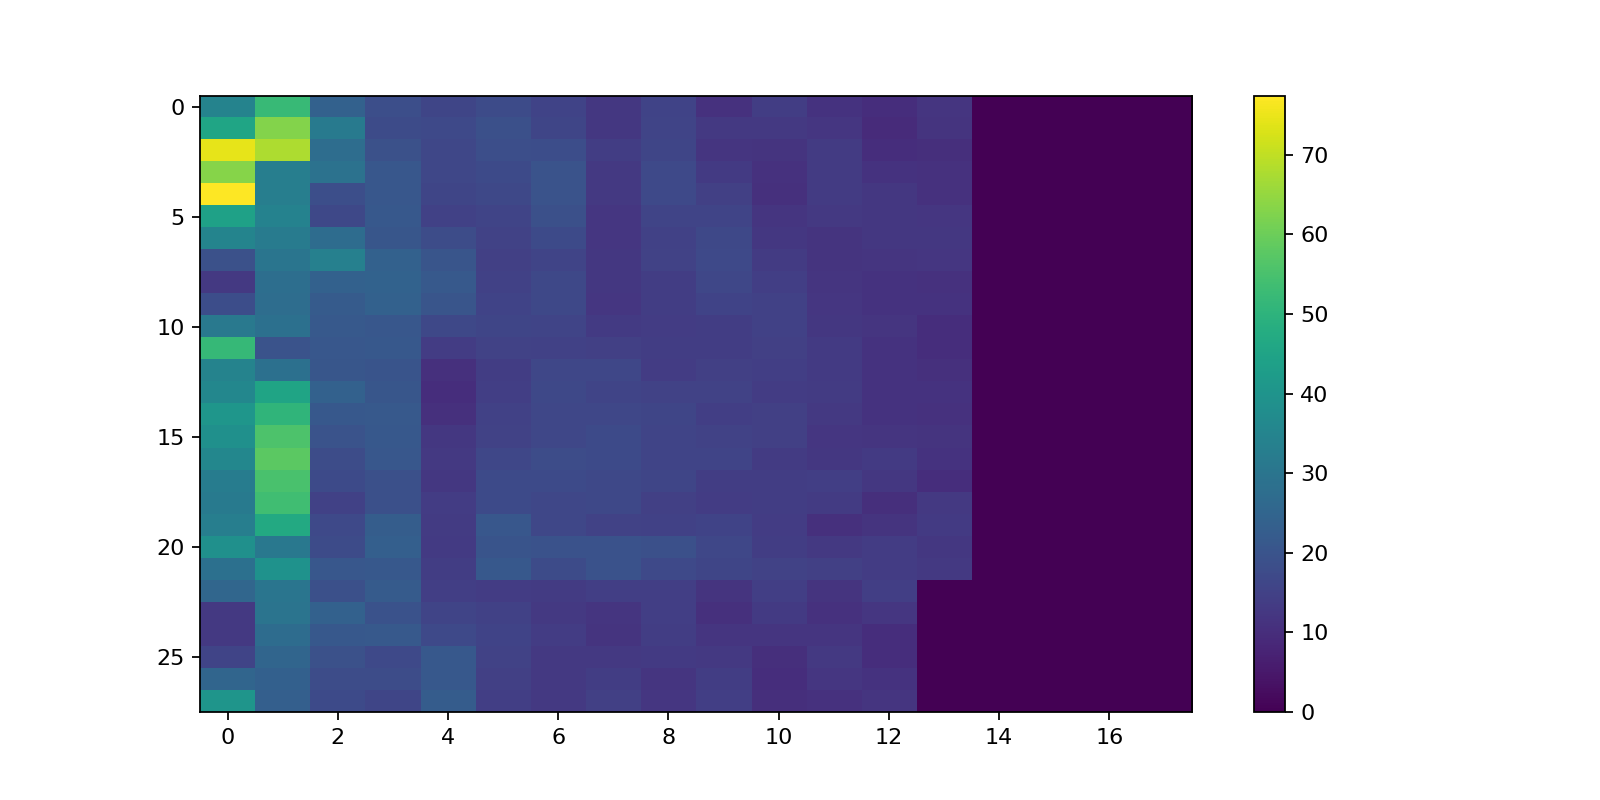

In [131]:
%matplotlib notebook
plt.figure(figsize=(10,5))
plt.imshow(two_d_array, aspect='auto')
# why is it so discontinuous 
# check spectra based on coordinates!!!!!!!!!!
plt.colorbar()

In [ ]:
v = np.array(final_chis_ewns)
v.shape = (100,100)

print(v)
plt.figure()
#subtract off center shift from original q_ew and q_ns values
plt.imshow(v,vmax=2,extent=[y1[0]+ 0.000366718, y1[-1]+ 0.000366718, y1[0]-0.0012196, y1[-1]-0.0012196], origin='lower', cmap='plasma')
#plt.imshow(v, vmax=2, extent=[q_ns_min_new[0], q_ns_min_new[-1], q_ew_min_new[0], q_ew_min_new[-1]], origin='lower')
plt.xlabel('Range of Error in $Q_{ns}$')
plt.ylabel('Range of Error in $Q_{ew}$')
#plt.title('Difference in $\Chi^2$ for')
plt.colorbar()
plt.show() extent is the x and y values / axes plt.imshow(np.log10(spectra_array[:,400:600]),vmin=-4,vmax=-0.6,cmap='magma',aspect='auto',interpolation= 'gaussian', extent=[freq[0],freq[-1],times[-1]-times[0],0]) #xfirst then y
plt.colorbar()